In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


#from __future__ import print_function
from sklearn.cluster import KMeans
plt.style.use('ggplot')
%matplotlib inline


In [49]:
df_raw = pd.read_csv('/Users/trevorban/Desktop/zri-data/acs_master11to18_clean.csv')

In [50]:
df = df_raw.copy()

In [51]:
df.dtypes

Unnamed: 0                                                       int64
zip_code                                                       float64
male_pop                                                       float64
female_pop                                                     float64
median_age                                                     float64
white_pop                                                      float64
not_us_citizen_pop                                             float64
black_pop                                                      float64
asian_pop                                                      float64
hispanic_pop                                                   float64
amerindian_pop                                                 float64
other_race_pop                                                 float64
median_income                                                  float64
income_per_capita                                              float64
pop_de

In [52]:
df.shape

(20544, 40)

In [53]:
df.isna().any()

Unnamed: 0                                                     False
zip_code                                                       False
male_pop                                                       False
female_pop                                                     False
median_age                                                     False
white_pop                                                      False
not_us_citizen_pop                                             False
black_pop                                                      False
asian_pop                                                      False
hispanic_pop                                                   False
amerindian_pop                                                 False
other_race_pop                                                 False
median_income                                                  False
income_per_capita                                              False
pop_determined_poverty_status     

In [54]:
# remove all rows that contain nulls
df2 = df.dropna(how='any',axis=0) 

In [55]:
# OR remove the three columns that contain nulls and store in 'nulls'
nulls = df[['aggregate_travel_time_to_work', 'high_school_diploma', 'bachelors_degree']]

In [56]:
df = df.drop(columns=['aggregate_travel_time_to_work', 'high_school_diploma', 'bachelors_degree'])

In [57]:
df.isna().any()

Unnamed: 0                                                     False
zip_code                                                       False
male_pop                                                       False
female_pop                                                     False
median_age                                                     False
white_pop                                                      False
not_us_citizen_pop                                             False
black_pop                                                      False
asian_pop                                                      False
hispanic_pop                                                   False
amerindian_pop                                                 False
other_race_pop                                                 False
median_income                                                  False
income_per_capita                                              False
pop_determined_poverty_status     

In [58]:
nulls['aggregate_travel_time_to_work'].isna().sum() 

96

In [59]:
nulls['high_school_diploma'].isna().sum() 

2568

In [60]:
nulls['bachelors_degree'].isna().sum() 

2568

In [70]:
df2.Time = pd.to_datetime(df2.Time)

## kmeans attempt #1

In [108]:
x = df2.iloc[:, 2:4]

In [109]:
x

,male_pop,female_pop
2568,31982.0,32396.0
2569,31982.0,32396.0
2570,31982.0,32396.0
2571,31982.0,32396.0
2572,31982.0,32396.0
...,...,...
20539,39086.0,41178.0
20540,39086.0,41178.0
20541,39086.0,41178.0
20542,39086.0,41178.0


In [110]:
kmeans = KMeans()

In [111]:
kmeans.set_params(n_clusters=2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [112]:
kmeans.cluster_centers_

array([[31845.85587583, 33018.25277162],
       [15089.70288461, 15446.29519231]])

In [113]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [115]:
#! pip install yellowbrick

In [116]:
from yellowbrick.cluster import SilhouetteVisualizer


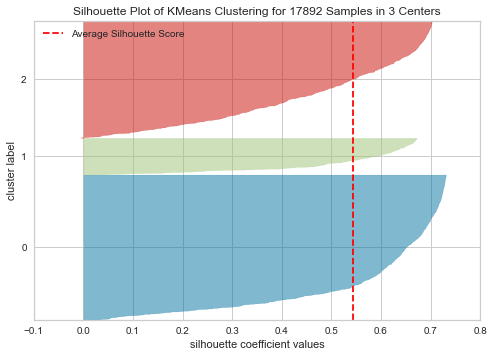

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 17892 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [117]:
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()   

In [122]:
x.iloc[:, 0]

2568     31982.0
2569     31982.0
2570     31982.0
2571     31982.0
2572     31982.0
          ...   
20539    39086.0
20540    39086.0
20541    39086.0
20542    39086.0
20543    39086.0
Name: male_pop, Length: 17892, dtype: float64

0

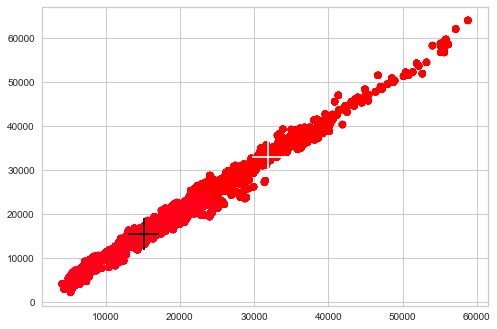

In [127]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=kmeans.labels_, alpha=0.8, cmap='hsv')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='+', s=1000, c=[0, 1])
plt.show()